# 11 Model \#1: Naive Bayes
__Math 3080: Fundamentals of Data Science__

Reading:
* Grus, Chapter 13 Naive Bayes

Outline:
* Review of Bayes' Theorem
* Simple Spam Filter
* What is meant by *Naive*
* More complicated example
* How does this fit with Machine Learning models? (Supervision, Online/Offline, Instance- or Model-based)

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
messages = {"Words":["Hey","Call","lunch","help"],
            "Times in Spam": [6,5,0,3],
            "Times in Ham" : [3,5,7,4]}

pd.DataFrame(messages)

,Words,Times in Spam,Times in Ham
0,Hey,6,3
1,Call,5,5
2,lunch,0,7
3,help,3,4


1. Find $P(S)$ and $P(H)$
2. Countplots
3. Make up a text message and find probabilities
    * "Hey, I've been trying to call you." (Spam)
    * "Can I meet you for lunch? In need help with my math." (Ham)

It is called *Naive* Bayes because the variables are assumed to be independent of each other. For example, there is no difference between "Good morning" and "Morning good". Words are independent of each other.
* Obviously not true, but this model still works really well all the same.

In [8]:
numbers = {'Condition 1':[0,0,1,0,2,1,0,2,2,1,0,0,2,2,1,2,0,2,1,0],
           'Condition 2':[0,1,2,0,2,1,2,0,1,0,1,2,0,0,0,1,2,1,2,0],
           'Diagnosis'  :[0,1,1,1,0,0,1,0,0,0,0,0,1,1,1,0,1,0,1,0]}
numbers = pd.DataFrame(numbers)
numbers

,Condition 1,Condition 2,Diagnosis
0,0,0,0
1,0,1,1
2,1,2,1
3,0,0,1
4,2,2,0
5,1,1,0
6,0,2,1
7,2,0,0
8,2,1,0
9,1,0,0


In [9]:
numbers.sort_values(by=['Condition 1','Condition 2'])

,Condition 1,Condition 2,Diagnosis
0,0,0,0
3,0,0,1
19,0,0,0
1,0,1,1
10,0,1,0
6,0,2,1
11,0,2,0
16,0,2,1
9,1,0,0
14,1,0,1


/home/meo/.virtualenvs/DataScience/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<AxesSubplot: title={'center': 'Condition 1 = 2 | Condition 2 = 2'}, xlabel='Diagnosis', ylabel='count'>

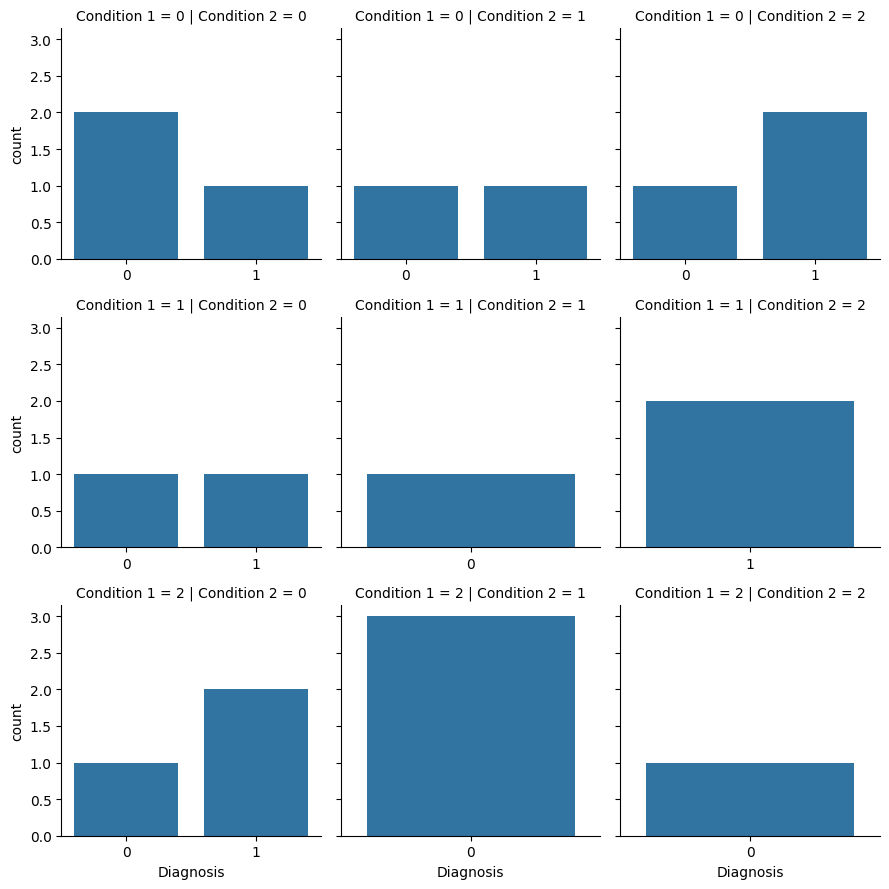

In [45]:
g = sns.FacetGrid(numbers, row='Condition 1', col='Condition 2', sharex=False)
g.map(sns.countplot, 'Diagnosis', dodge=True)
sns.countplot()

<AxesSubplot: xlabel='Diagnosis', ylabel='count'>

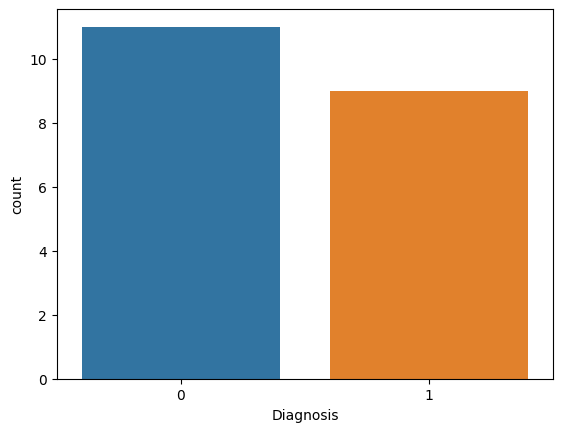

In [38]:
sns.countplot(data=numbers, x='Diagnosis')

In [10]:
num_obs = len(numbers)
num_obs

20

In [11]:
positive = numbers[numbers['Diagnosis'] == 1]
negative = numbers[numbers['Diagnosis'] == 0]

num_pos = len(positive)
num_neg = len(negative)

positive

,Condition 1,Condition 2,Diagnosis
1,0,1,1
2,1,2,1
3,0,0,1
6,0,2,1
12,2,0,1
13,2,0,1
14,1,0,1
16,0,2,1
18,1,2,1


In [12]:
negative

,Condition 1,Condition 2,Diagnosis
0,0,0,0
4,2,2,0
5,1,1,0
7,2,0,0
8,2,1,0
9,1,0,0
10,0,1,0
11,0,2,0
15,2,1,0
17,2,1,0


In [13]:
results = pd.DataFrame(columns=['X1','X2','Positive','Negative'])
results

index = 0
for i in [0,1,2]:
    for j in [0,1,2]:
        num = len(positive[(positive['Condition 1'] == i) & (positive['Condition 2'] == j)])
        prob_pos = (num/num_pos) * (num_pos/num_obs)
        num = len(negative[(negative['Condition 1'] == i) & (negative['Condition 2'] == j)])
        prob_neg = (num/num_neg) * (num_neg/num_obs)
        results.loc[index] = [i,j,prob_pos,prob_neg]
        index += 1

In [14]:
results
# Remember that each of the Positive/Negative results is a number divided by P(X1,X2)
# This is the same for both Positive and Negative, so each number is divided by the same value
# Thus, whatever that probability is, it is irrelevant.
# In this example, we could easily calculate it in our nested for loop, but no real point

,X1,X2,Positive,Negative
0,0.0,0.0,0.05,0.10
1,0.0,1.0,0.05,0.05
2,0.0,2.0,0.10,0.05
3,1.0,0.0,0.05,0.05
4,1.0,1.0,0.00,0.05
5,1.0,2.0,0.10,0.00
6,2.0,0.0,0.10,0.05
7,2.0,1.0,0.00,0.15
8,2.0,2.0,0.00,0.05


In [15]:
# Difference ---> Positive if Greater than 0, Negative if Less than 0
results['Prediction'] = results['Positive']-results['Negative']

# Convert to 1 or 0 
  # Divide by absolute value to get +1 or -1,
  # Divide by 2 to get +0.5 or -0.5
  # Add 0.5 to get 1 or 0
  # Turn into an integer
results['Prediction'] = (results['Prediction']/abs(results['Prediction'])/2 + 0.5).apply(int)
results

,X1,X2,Positive,Negative,Prediction
0,0.0,0.0,0.05,0.10,0
1,0.0,1.0,0.05,0.05,0
2,0.0,2.0,0.10,0.05,1
3,1.0,0.0,0.05,0.05,0
4,1.0,1.0,0.00,0.05,0
5,1.0,2.0,0.10,0.00,1
6,2.0,0.0,0.10,0.05,1
7,2.0,1.0,0.00,0.15,0
8,2.0,2.0,0.00,0.05,0


Naive Bayes is
* __Supervised__ or unsupervised?
* (__Offline Learning / Batch Learning__) or (Online Learning / Incremental Learning)?
* (Instance-based) or (Model-based) Learning?
  * The diagnosis example is Instance-based, though this could be model-based if the scenario were different

In [22]:
messages = pd.read_csv('../Datasets/spam.csv', encoding = "ISO-8859-1")
messages.drop('Unnamed: 2', axis=1, inplace=True)
messages.drop('Unnamed: 3', axis=1, inplace=True)
messages.drop('Unnamed: 4', axis=1, inplace=True)
messages.columns = ['Spam','Message']
messages

,Spam,Message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Ci..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 t...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 cl...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else ...


In [31]:
cancer = pd.read_csv('../Datasets/Breast_cancer_data.csv')
cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


<AxesSubplot: xlabel='diagnosis', ylabel='count'>

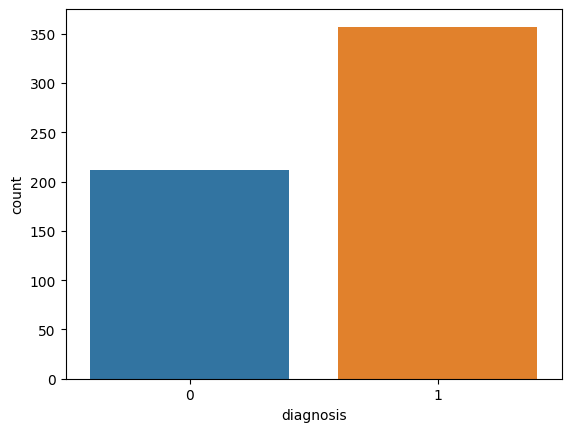

In [33]:
sns.countplot(data=cancer, x='diagnosis')

In [34]:
cancer.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


<AxesSubplot: >

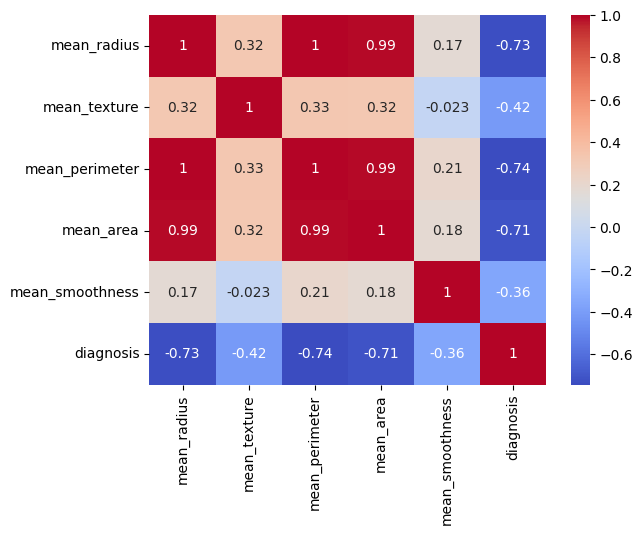

In [41]:
sns.heatmap(cancer.corr(), cmap='coolwarm', annot=True)
#sns.color_palette('vlag', as_cmap=True)

In [42]:
cancer = cancer[['mean_radius','mean_texture','mean_smoothness','diagnosis']]
cancer.head()

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
